In [1]:
import pandas as pd
from math import comb
from ax.service.ax_client import AxClient
import time
import sys
import numpy as np
from ax.core.optimization_config import MultiObjectiveOptimizationConfig
from ax.core.outcome_constraint import OutcomeConstraint, ComparisonOp



sys.path.append('../')
import sdlnano as sdl
import calculation as calc

In [2]:
trials_per_iteration = 1

In [3]:
optimizer_init_file_name = "optimizer/optimizer_0_init.json"

client_init = sdl.initialize_ax(SOBOL_trials=trials_per_iteration)
client_init.save_to_json_file(optimizer_init_file_name)

[WARNING 07-25 08:57:21] ax.api.client: Metric IMetric('Solu') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:57:21] ax.api.client: Metric IMetric('Size') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:57:21] ax.api.client: Metric IMetric('PDI') not found in optimization config, added as tracking metric.
[WARNING 07-25 08:57:21] ax.api.client: Metric IMetric('Complexity') not found in optimization config, added as tracking metric.


In [ ]:
def run_virtual_test(n):

    iteration = 0

    for iteration in range(n):

        print('*-' * 150)
        print('*-' * 150)
        print(f"Iteration {iteration} of {n-1}")

        

        if iteration == 0:
            unlabeled_trial, client_design = sdl.generate_trials(ax_client=client_init, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=0)

        else:
            unlabeled_trial, client_design = sdl.generate_trials(ax_client=client_design, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=1)

        new_cap = 12 - iteration
        client_design.configure_optimization(
            objective="Solu, -Size, -PDI",
            outcome_constraints=[f"Complexity <= {new_cap}"]
        )
        
        print(f"Updated outcome constraint: Complexity <= {new_cap}")
        print("Current optimization config:", client_design._experiment.optimization_config)


        labeled_norm_path = 'data/labeled_norm_' + str(iteration) + '.xlsx'
        loaded_optimizer_path = "optimizer/optimizer_load_" + str(iteration) + ".json"

        results = sdl.virtual_experiment(unlabeled_trial)
        results.to_excel(labeled_norm_path, index=False)

        loaded_client = sdl.load_labeled_data(client_design, labeled_norm_path)
        loaded_client.save_to_json_file(loaded_optimizer_path)
        
        print('*-' * 150)
        print('*-' * 150)
        print()

    return loaded_client
        

In [5]:
client = run_virtual_test(20)



[WARNING 07-25 08:57:22] ax.modelbridge.transforms.standardize_y: Outcome Complexity is constant, within tolerance.
[WARNING 07-25 08:57:22] ax.modelbridge.transforms.standardize_y: Outcome PDI is constant, within tolerance.
[WARNING 07-25 08:57:22] ax.modelbridge.transforms.standardize_y: Outcome Size is constant, within tolerance.
[WARNING 07-25 08:57:22] ax.modelbridge.transforms.standardize_y: Outcome Solu is constant, within tolerance.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Iteration 0 of 19
Updated outcome constraint: Complexity <= 12
Current optimization config: MultiObjectiveOptimizationConfig(objective=MultiObjective(objectives=[Objective(metric_name="Solu", minimize=False), Objective(metric_name="Size", minimize=True), Objective(metric_name="PDI", minimize=True)]), outcome_constraints=[OutcomeConstraint(Complexity <= 12.0)], objective_thresholds=[])
*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:382: UserWarning: Encountered exception in computing model fit quality: Outcome `Complexity` was not observed.
  warn("Encountered exception in computing model fit quality: " + str(e))


Updated outcome constraint: Complexity <= 11
Current optimization config: MultiObjectiveOptimizationConfig(objective=MultiObjective(objectives=[Objective(metric_name="Solu", minimize=False), Objective(metric_name="Size", minimize=True), Objective(metric_name="PDI", minimize=True)]), outcome_constraints=[OutcomeConstraint(Complexity <= 11.0)], objective_thresholds=[])
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*

In [6]:
from ax.service.utils.report_utils import exp_to_df


final_df = exp_to_df(client._experiment)
final_df

,trial_index,arm_name,trial_status,generation_method,is_feasible,Complexity,PDI,Size,Solu,Drug_MW,...,LL_1,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water
0,0,0_0,COMPLETED,Sobol,False,12.0,0.415969,0.275403,0.299023,0.475107,...,0.347466,0.846915,0.761508,0.882807,0.880169,0.802465,0.851061,0.364698,0.951965,0.222008
1,1,1_0,COMPLETED,BoTorch,False,5.0,0.255077,0.700000,0.330463,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
2,2,2_0,COMPLETED,BoTorch,False,5.0,0.250298,0.700000,0.301787,0.829495,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,3,3_0,COMPLETED,BoTorch,False,11.0,0.287852,0.572429,0.211395,0.000000,...,0.806347,0.261937,0.230944,0.275492,0.274490,0.245573,0.263467,0.812064,0.302680,0.763258
4,4,4_0,COMPLETED,BoTorch,False,5.0,0.252215,0.700000,0.313289,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
5,5,5_0,COMPLETED,BoTorch,False,6.0,0.254073,0.700000,0.324440,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385852,1.000000,0.000000,1.000000
6,6,6_0,COMPLETED,BoTorch,False,10.0,0.266048,0.453826,0.198664,0.000000,...,0.628851,0.333028,0.356627,0.319294,0.320396,0.346795,0.000000,0.628009,0.000000,0.646904
7,7,7_0,COMPLETED,BoTorch,False,10.0,0.190710,0.384855,0.256883,0.000000,...,0.307925,0.173524,0.402386,0.099365,0.104175,0.286241,0.000000,0.279903,0.000000,0.644594
8,8,8_0,COMPLETED,BoTorch,False,6.0,0.108949,0.413901,0.383151,0.000000,...,0.209751,0.000000,0.218211,0.000000,0.000000,0.000000,0.000000,0.218989,0.000000,0.933509
9,9,9_0,COMPLETED,BoTorch,False,9.0,0.086952,0.319063,0.388235,0.000000,...,0.057881,0.136786,0.621961,0.254813,0.250576,0.000000,0.000000,0.106829,0.000000,0.912270


In [7]:

iteration_list = []

n = 1  
length = len(final_df)
number_list = [i // n for i in range(length)]

final_df['iteration'] = number_list
final_df

,trial_index,arm_name,trial_status,generation_method,is_feasible,Complexity,PDI,Size,Solu,Drug_MW,...,LL_2,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water,iteration
0,0,0_0,COMPLETED,Sobol,False,12.0,0.415969,0.275403,0.299023,0.475107,...,0.846915,0.761508,0.882807,0.880169,0.802465,0.851061,0.364698,0.951965,0.222008,0
1,1,1_0,COMPLETED,BoTorch,False,5.0,0.255077,0.700000,0.330463,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1
2,2,2_0,COMPLETED,BoTorch,False,5.0,0.250298,0.700000,0.301787,0.829495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2
3,3,3_0,COMPLETED,BoTorch,False,11.0,0.287852,0.572429,0.211395,0.000000,...,0.261937,0.230944,0.275492,0.274490,0.245573,0.263467,0.812064,0.302680,0.763258,3
4,4,4_0,COMPLETED,BoTorch,False,5.0,0.252215,0.700000,0.313289,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4
5,5,5_0,COMPLETED,BoTorch,False,6.0,0.254073,0.700000,0.324440,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.385852,1.000000,0.000000,1.000000,5
6,6,6_0,COMPLETED,BoTorch,False,10.0,0.266048,0.453826,0.198664,0.000000,...,0.333028,0.356627,0.319294,0.320396,0.346795,0.000000,0.628009,0.000000,0.646904,6
7,7,7_0,COMPLETED,BoTorch,False,10.0,0.190710,0.384855,0.256883,0.000000,...,0.173524,0.402386,0.099365,0.104175,0.286241,0.000000,0.279903,0.000000,0.644594,7
8,8,8_0,COMPLETED,BoTorch,False,6.0,0.108949,0.413901,0.383151,0.000000,...,0.000000,0.218211,0.000000,0.000000,0.000000,0.000000,0.218989,0.000000,0.933509,8
9,9,9_0,COMPLETED,BoTorch,False,9.0,0.086952,0.319063,0.388235,0.000000,...,0.136786,0.621961,0.254813,0.250576,0.000000,0.000000,0.106829,0.000000,0.912270,9


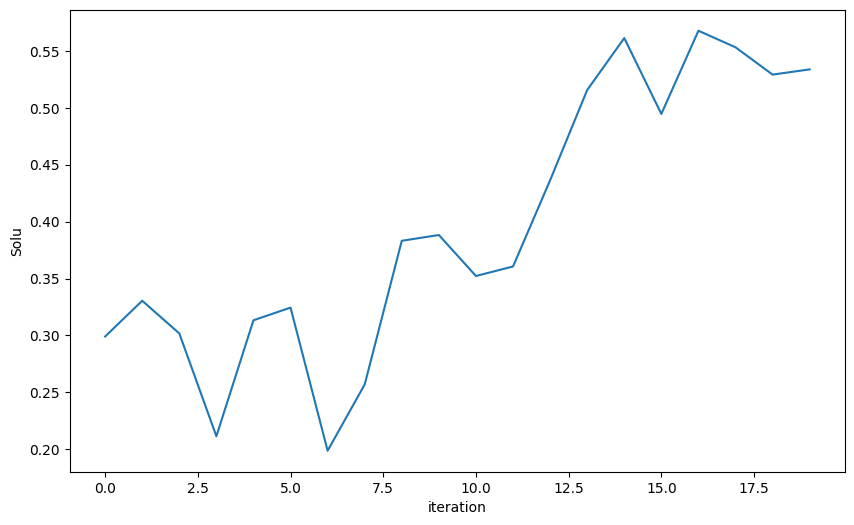

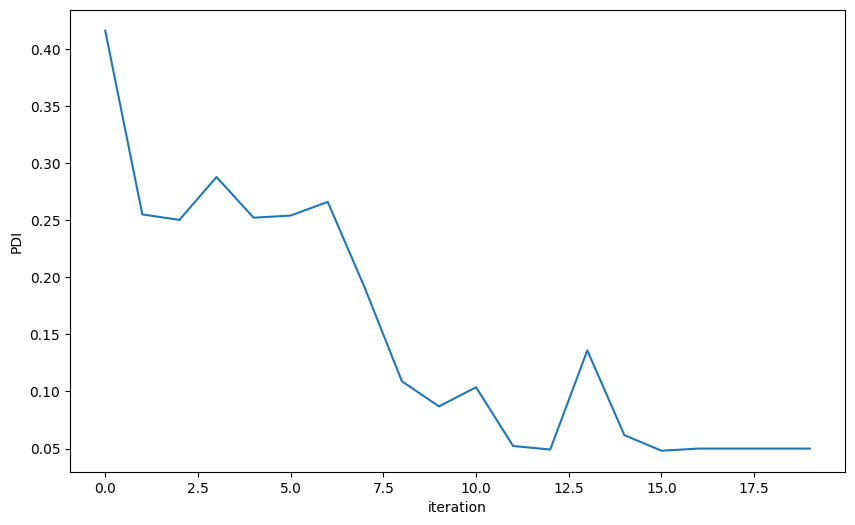

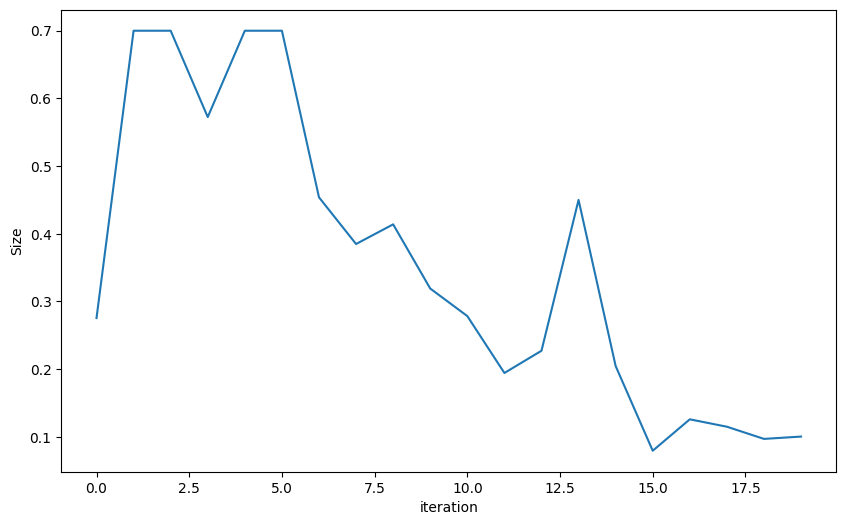

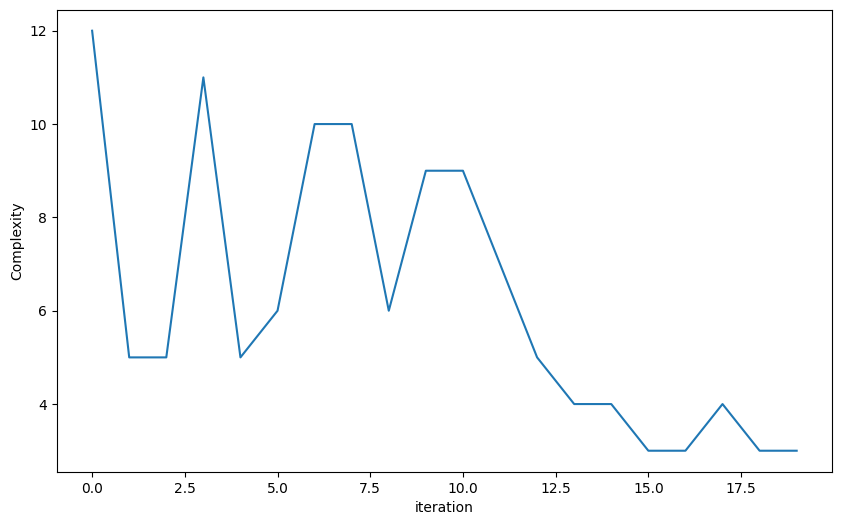

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for obj in ['Solu', 'PDI', 'Size', 'Complexity']:

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=final_df, x='iteration', y=obj)


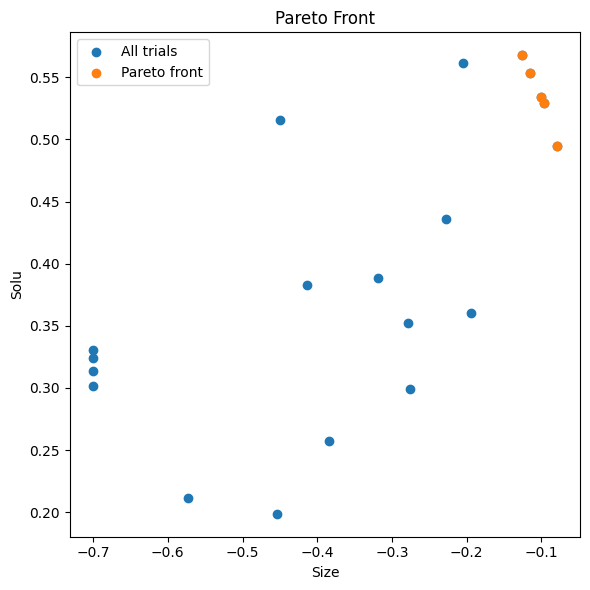

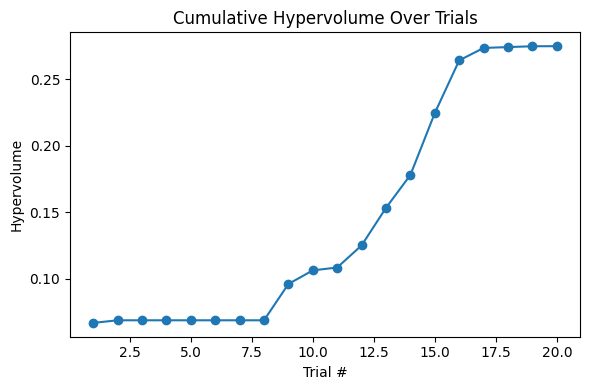

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ax.service.utils.report_utils import exp_to_df

def is_pareto_efficient(points):
    """Return a boolean mask of Pareto-efficient points (assumes maximization)."""
    is_efficient = np.ones(points.shape[0], dtype=bool)
    for i, p in enumerate(points):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(points[is_efficient] > p, axis=1)
            is_efficient[i] = True
    return is_efficient

def plot_pareto_and_hv(client):
    # 1) Pull trial data
    df = exp_to_df(client._experiment)
    opt_cfg = client._experiment.optimization_config
    objectives = opt_cfg.objective.objectives

    # 2) Extract metric names and weights
    names = [o.metric.name for o in objectives]
    weights = np.array([1.0 if not o.minimize else -1.0 for o in objectives], dtype=float)

    # 3) Build objective array (n_trials × n_objectives)
    vals = df[names].to_numpy(dtype=float)
    objs = vals * weights

    # 4) Plot 2D Pareto front (first two objectives)
    mask = is_pareto_efficient(objs[:, :2])
    plt.figure(figsize=(6, 6))
    plt.scatter(objs[:, 1], objs[:, 0], label='All trials')
    plt.scatter(objs[mask, 1], objs[mask, 0], label='Pareto front')
    plt.xlabel(names[1])
    plt.ylabel(names[0])
    plt.title('Pareto Front')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 5) Compute cumulative 2D hypervolume
    mins = objs[:, :2].min(axis=0)
    maxs = objs[:, :2].max(axis=0)
    ref = mins - 0.1 * (maxs - mins)  # reference point slightly below worst

    hv_list = []
    for i in range(objs.shape[0]):
        pts = objs[: i + 1, :2]
        pareto_pts = pts[is_pareto_efficient(pts)]
        if pareto_pts.size == 0:
            hv = 0.0
        else:
            # 2D hypervolume via rectangle sweep
            order = np.argsort(-pareto_pts[:, 0])
            x = pareto_pts[order, 0]
            y = pareto_pts[order, 1]
            hv = (x[0] - ref[0]) * (y[0] - ref[1])
            for j in range(1, len(x)):
                hv += (x[j] - ref[0]) * (y[j] - y[j - 1])
        hv_list.append(hv)

    plt.figure(figsize=(6, 4))
    plt.plot(np.arange(1, len(hv_list) + 1), hv_list, marker='o')
    plt.xlabel('Trial #')
    plt.ylabel('Hypervolume')
    plt.title('Cumulative Hypervolume Over Trials')
    plt.tight_layout()
    plt.show()

# Usage:
plot_pareto_and_hv(client)
